# importing libraries

In [1]:
import mysql.connector
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings('ignore')

# Connect to server

In [2]:
conn = mysql.connector.connect(
    host="127.0.0.1",
    port=3306,
    user="root",
    password="xyz")

# Load Dataset

In [3]:
query = "SELECT * FROM Banking.customer"
df = pd.read_sql(query, conn)
pd.set_option('display.max_columns', None)  # Show all columns
df.head()

,Client ID,Name,Age,Location ID,Joined Bank,Banking Contact,Nationality,Occupation,Fee Structure,Loyalty Classification,Estimated Income,Superannuation Savings,Amount of Credit Cards,Credit Card Balance,Bank Loans,Bank Deposits,Checking Accounts,Saving Accounts,Foreign Currency Account,Business Lending,Properties Owned,Risk Weighting,BRId,GenderId,IAId
0,IND81288,Raymond Mills,24,34324,06-05-2019,Anthony Torres,American,Safety Technician IV,High,Jade,75384.77,17677.95,1,484.54,776242.92,1485828.64,603617.88,607332.46,12249.96,1134475.30,1,2,1,1,1
1,IND65833,Julia Spencer,23,42205,10-12-2001,Jonathan Hawkins,African,Software Consultant,High,Jade,289834.31,17398.92,1,2256.88,1270615.43,641482.79,229521.37,344635.16,61162.31,2000526.10,1,3,2,1,2
2,IND47499,Stephen Murray,27,7314,25-01-2010,Anthony Berry,European,Help Desk Operator,High,Gold,169935.23,42825.90,2,4568.74,1052715.84,1033401.59,652674.69,203054.35,79071.78,548137.58,1,3,3,2,3
3,IND72498,Virginia Garza,40,34594,28-03-2019,Steve Diaz,American,Geologist II,Mid,Silver,356808.11,5473.15,2,4205.00,121195.06,1048157.49,1048157.49,234685.02,57513.65,1148402.29,0,4,4,1,4
4,IND60181,Melissa Sanders,46,41269,20-07-2012,Shawn Long,American,Assistant Professor,Mid,Platinum,130711.68,48077.60,1,3779.49,1048301.95,487782.53,446644.25,128351.45,30012.14,1674412.12,0,3,1,2,5


# Data Preprocessing

In [4]:
(df.isnull().sum()/ df.shape[0]) * 100

Client ID                   0.0
Name                        0.0
Age                         0.0
Location ID                 0.0
Joined Bank                 0.0
Banking Contact             0.0
Nationality                 0.0
Occupation                  0.0
Fee Structure               0.0
Loyalty Classification      0.0
Estimated Income            0.0
Superannuation Savings      0.0
Amount of Credit Cards      0.0
Credit Card Balance         0.0
Bank Loans                  0.0
Bank Deposits               0.0
Checking Accounts           0.0
Saving Accounts             0.0
Foreign Currency Account    0.0
Business Lending            0.0
Properties Owned            0.0
Risk Weighting              0.0
BRId                        0.0
GenderId                    0.0
IAId                        0.0
dtype: float64

In [5]:
df.shape

(3000, 25)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 25 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Client ID                 3000 non-null   object 
 1   Name                      3000 non-null   object 
 2   Age                       3000 non-null   int64  
 3   Location ID               3000 non-null   int64  
 4   Joined Bank               3000 non-null   object 
 5   Banking Contact           3000 non-null   object 
 6   Nationality               3000 non-null   object 
 7   Occupation                3000 non-null   object 
 8   Fee Structure             3000 non-null   object 
 9   Loyalty Classification    3000 non-null   object 
 10  Estimated Income          3000 non-null   float64
 11  Superannuation Savings    3000 non-null   float64
 12  Amount of Credit Cards    3000 non-null   int64  
 13  Credit Card Balance       3000 non-null   float64
 14  Bank Loa

## Data Formatting & Convert datatypes

In [7]:
df['BRId'] = df['BRId'].replace({
    1: 'Retail',
    2: 'Institutional',
    3: 'Private Bank',
    4: 'Commercial'
}).astype(object)

In [8]:
df['IAId'] = df['IAId'].replace({
    1: 'Victor',
    2: 'Jeremy',
    3: 'Ernest',
    4: 'Eric',
    5: 'Kevin',
    6: 'Victor',
    7: 'Eugene',
    8: 'Joe',
    9: 'Steve',
    10: 'Lawrence',
    11: 'Peter',
    12: 'Victor',
    13: 'Daniel',
    14: 'Carl',
    15: 'Nicholas Ward',
    16: 'Fred',
    17: 'Ryan',
    18: 'Sean',
    19: 'Steve',
    20: 'Nicholas Morr',
    21: 'Juan',
    22: 'Gregory'
}).astype(object)

In [9]:
df['GenderId'] = df['GenderId'].replace({
    1: 'Male',
    2: 'Female'
}).astype(object)

In [10]:
df['Amount of Credit Cards'] = df['Amount of Credit Cards'].replace({
    1: 'One',
    2: 'Two',
    3: 'Three'
}).astype(object)

In [11]:
df["Joined Bank"] = pd.to_datetime(df["Joined Bank"], format="%d-%m-%Y")

## Binning

In [12]:
# Binning the Estimated Income.
bins = [0, 50000, 100000, float('inf')]
labels = ["Low", "Med", "High"]

df["Income Band"] = pd.cut(df["Estimated Income"], bins=bins, labels=labels, right=False)
df["Income Band"]

0        Med
1       High
2       High
3       High
4       High
        ... 
2995    High
2996     Low
2997     Low
2998    High
2999     Med
Name: Income Band, Length: 3000, dtype: category
Categories (3, object): ['Low' < 'Med' < 'High']

In [13]:
# df["Income Band"].value_counts().plot(kind='bar')
df["Income Band"].value_counts()

Income Band
High    1973
Med      740
Low      287
Name: count, dtype: int64

# Exploratory Data Analysis

## Stastical Summary

In [14]:
df.describe().T

,count,mean,min,25%,50%,75%,max,std
Age,3000.0,51.039667,17.0,34.0,51.0,69.0,85.0,19.85476
Location ID,3000.0,21563.323,12.0,10803.5,21129.5,32054.5,43369.0,12462.273017
Joined Bank,3000,2010-08-15 00:03:21.600000,1995-01-03 00:00:00,2004-04-01 18:00:00,2011-02-18 00:00:00,2017-12-24 06:00:00,2021-12-31 00:00:00,NaN
Estimated Income,3000.0,171305.034263,15919.48,82906.595,142313.48,242290.305,522330.26,111935.808209
Superannuation Savings,3000.0,25531.599673,1482.03,12513.775,22357.355,35464.74,75963.9,16259.95077
Credit Card Balance,3000.0,3176.206943,1.17,1236.63,2560.805,4522.6325,13991.99,2497.094709
Bank Loans,3000.0,591386.155487,0.0,239628.1375,479793.4,825813.0375,2667556.66,457557.036334
Bank Deposits,3000.0,671560.193923,0.0,204400.375,463316.46,942754.63,3890598.08,645716.856875
Checking Accounts,3000.0,321092.949127,0.0,119947.53,242815.655,434874.9375,1969923.08,282079.553893
Saving Accounts,3000.0,232908.353483,0.0,74794.405,164086.555,315575.0025,1724118.36,230007.777498


In [15]:
# Examine the distribution of unique categories in categorical columns.
categorical_col = df[["BRId", "GenderId", "IAId", "Amount of Credit Cards", "Nationality", "Fee Structure", "Loyalty Classification", "Properties Owned", "Risk Weighting", "Income Band"]].columns


## Univariate Analysis

In [16]:
df["Occupation"].value_counts()

Occupation
Associate Professor             28
Structural Analysis Engineer    28
Recruiter                       25
Account Coordinator             24
Human Resources Manager         24
                                ..
Office Assistant IV              8
Automation Specialist I          7
Computer Systems Analyst I       6
Developer III                    5
Senior Sales Associate           4
Name: count, Length: 195, dtype: int64

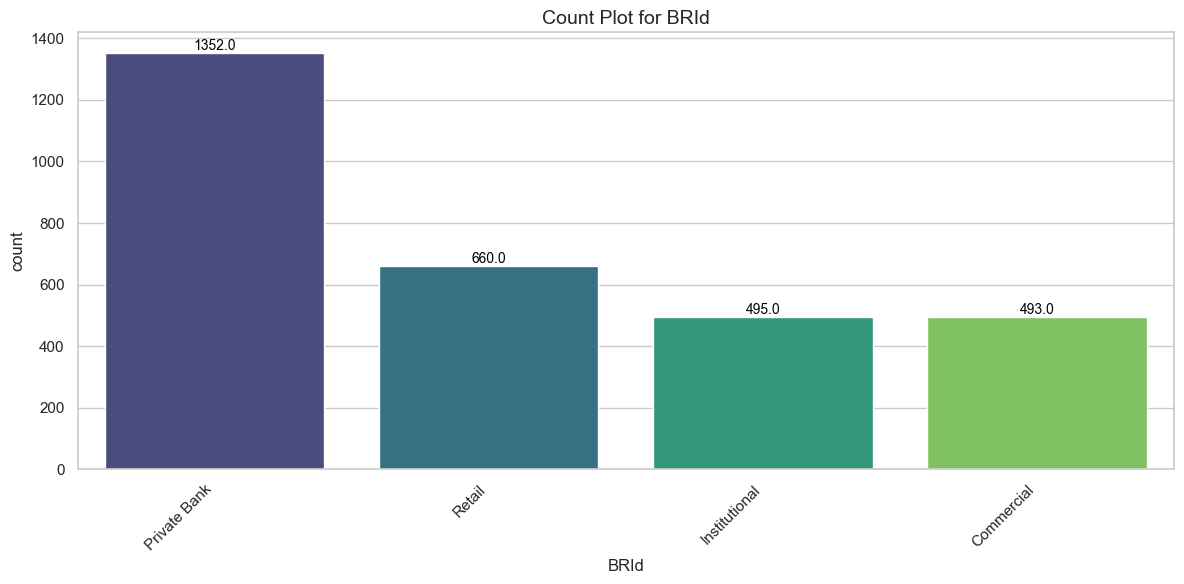

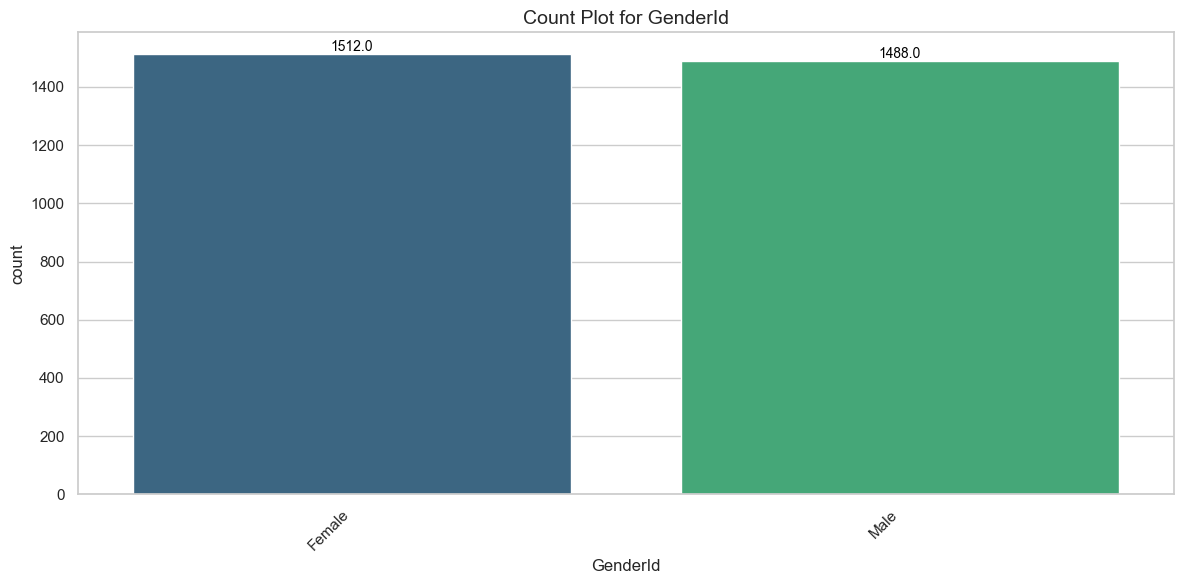

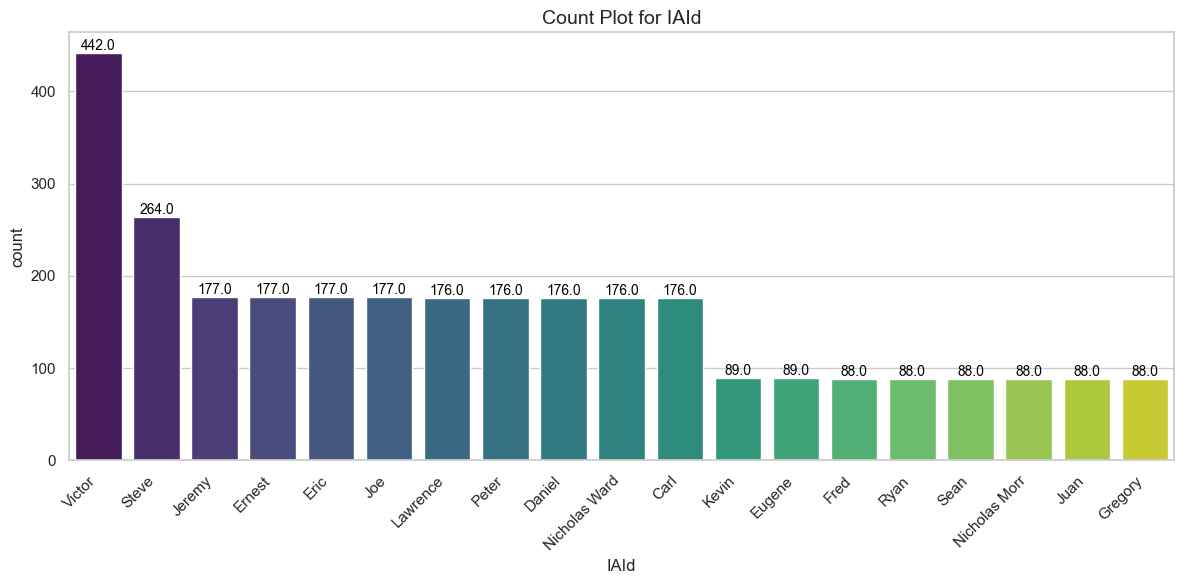

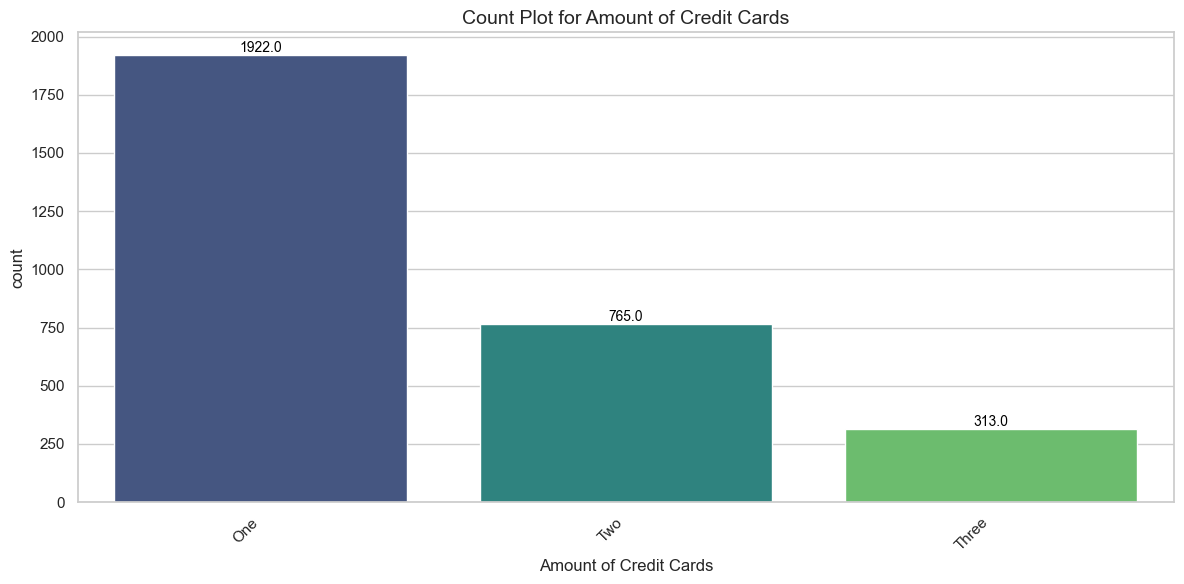

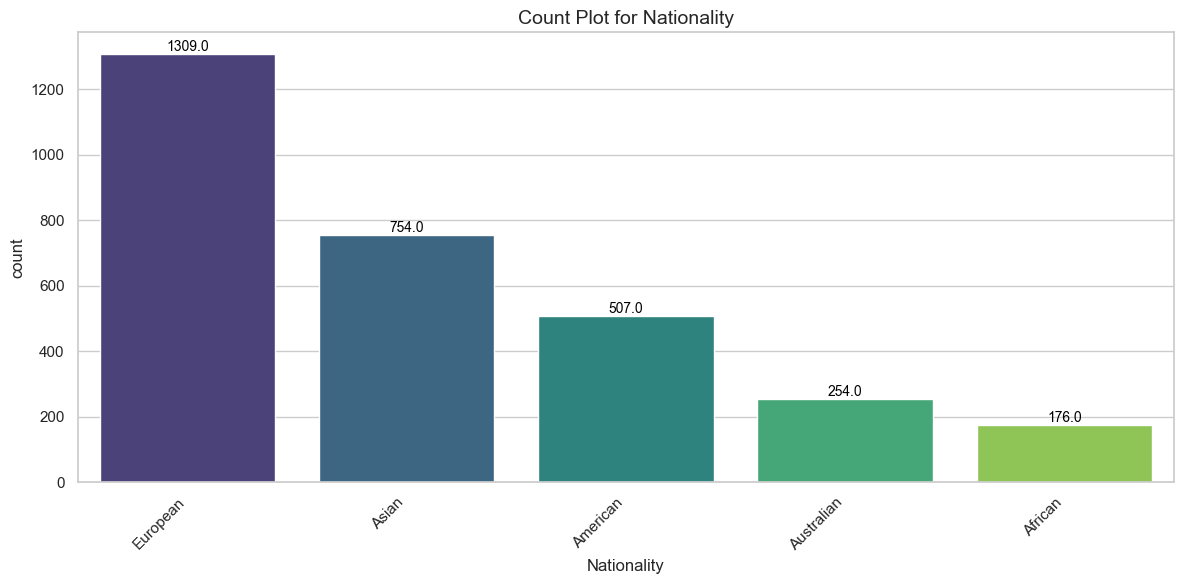

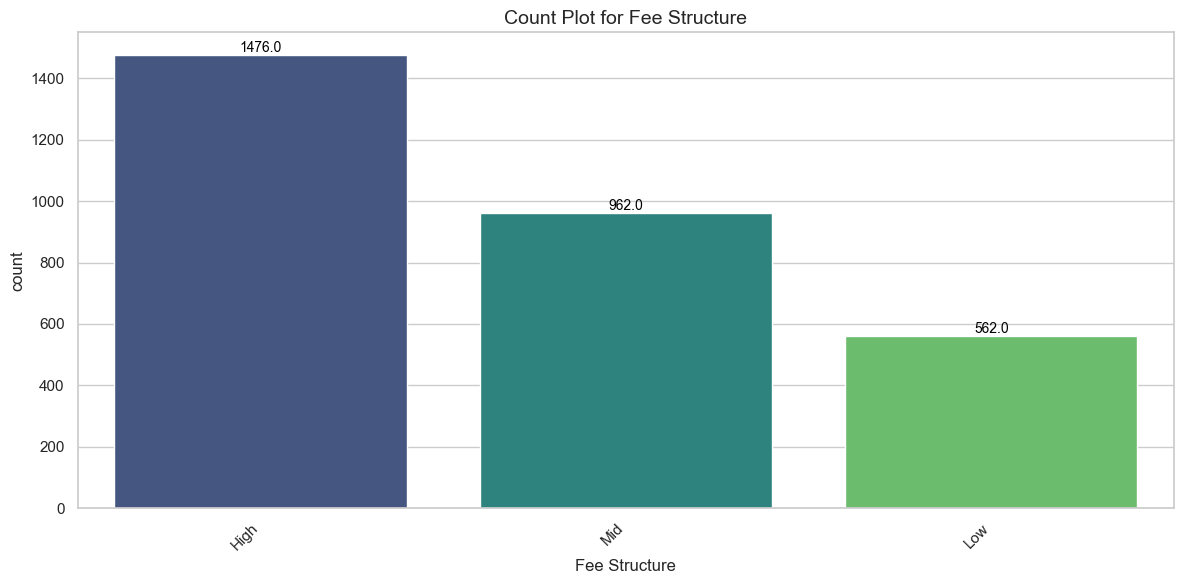

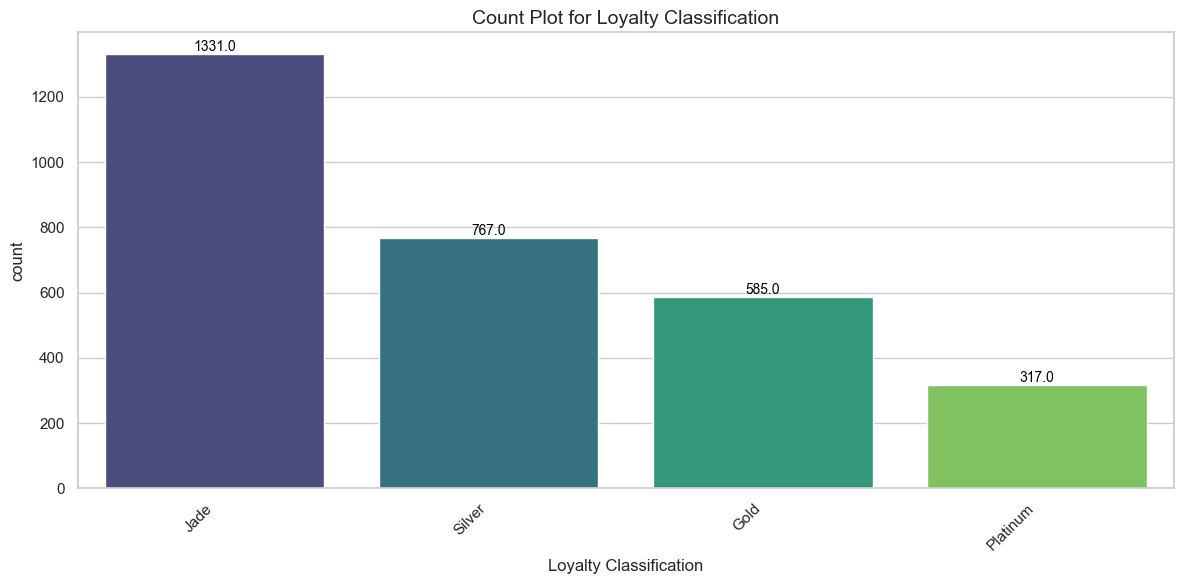

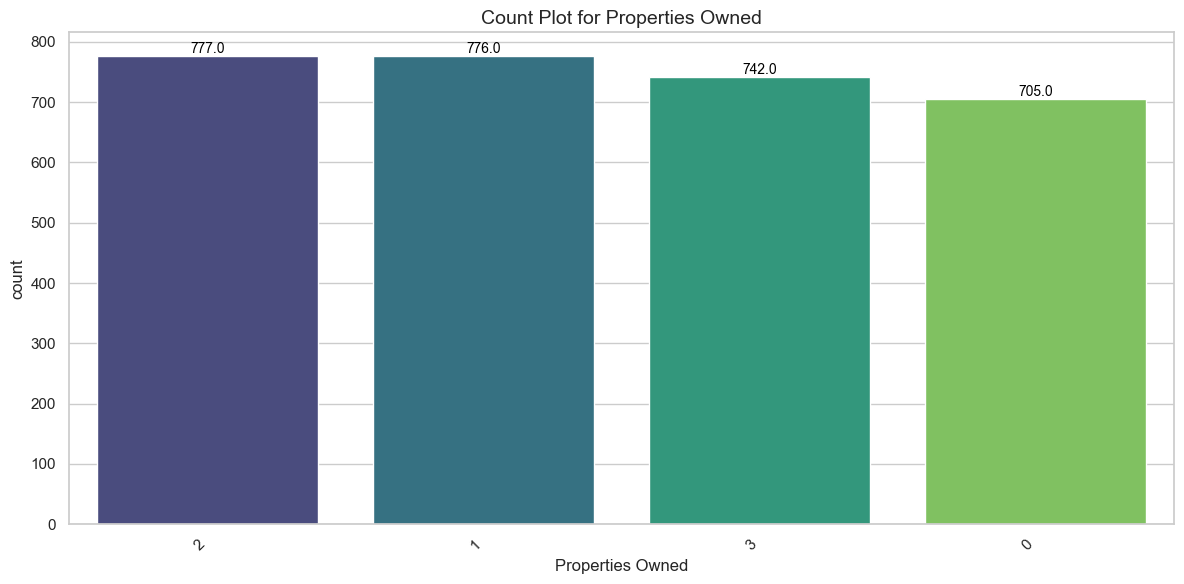

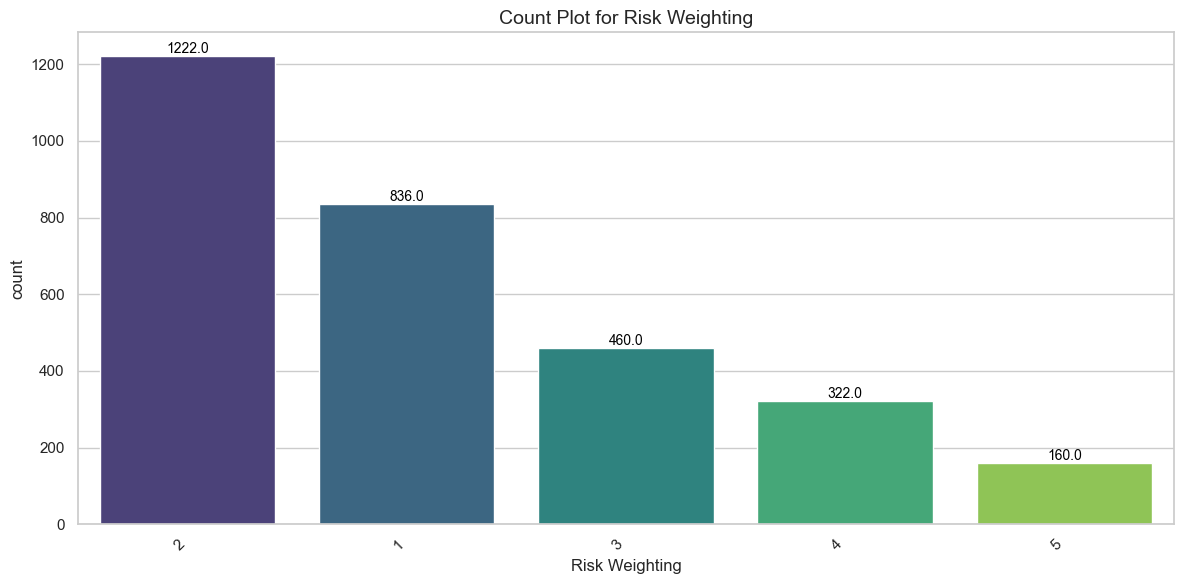

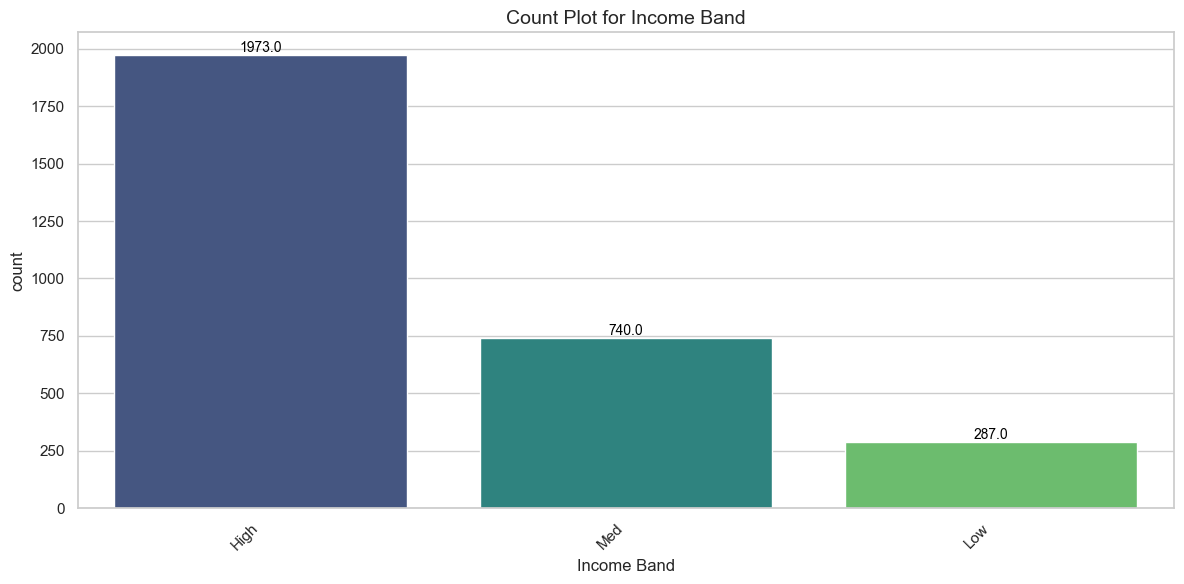

In [17]:
# Set seaborn style
sns.set(style="whitegrid")

# Define figure size globally
plt.rcParams["figure.figsize"] = (10, 5)

# Loop through categorical columns
for col in categorical_col:
    plt.figure(figsize=(12, 6))  # Bigger figure for visibility
    ax = sns.countplot(
        data=df,
        x=col,
        order=df[col].value_counts().index,
        palette="viridis"  # Better color palette
    )
    
    # Add value labels on bars
    for p in ax.patches:
        height = p.get_height()
        ax.annotate(f'{height}', (p.get_x() + p.get_width() / 2., height),
                    ha='center', va='bottom', fontsize=10, color='black')
    
    plt.title(f"Count Plot for {col}", fontsize=14)
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()


## Bivariate Analysis

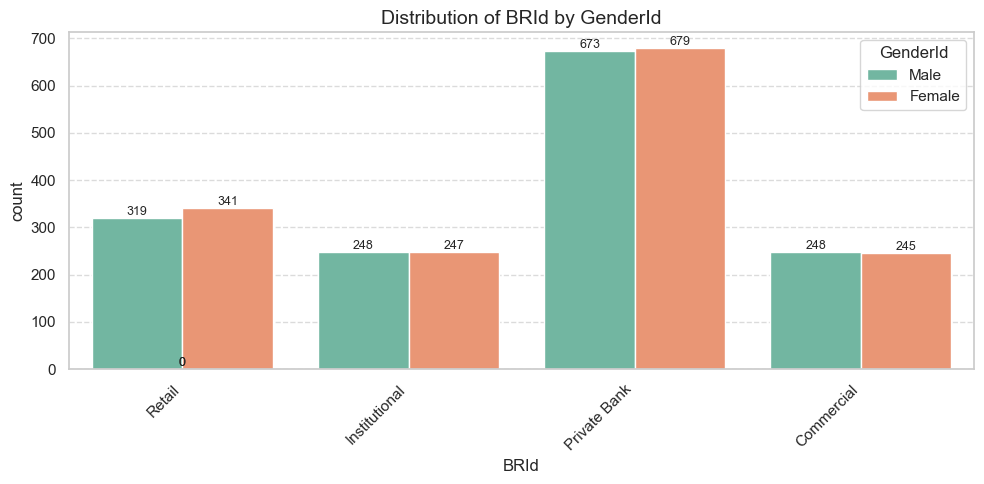

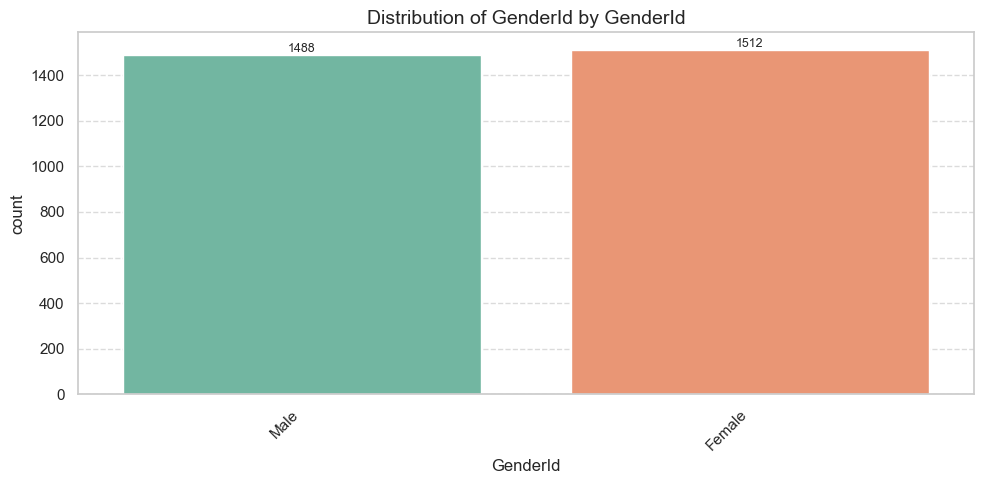

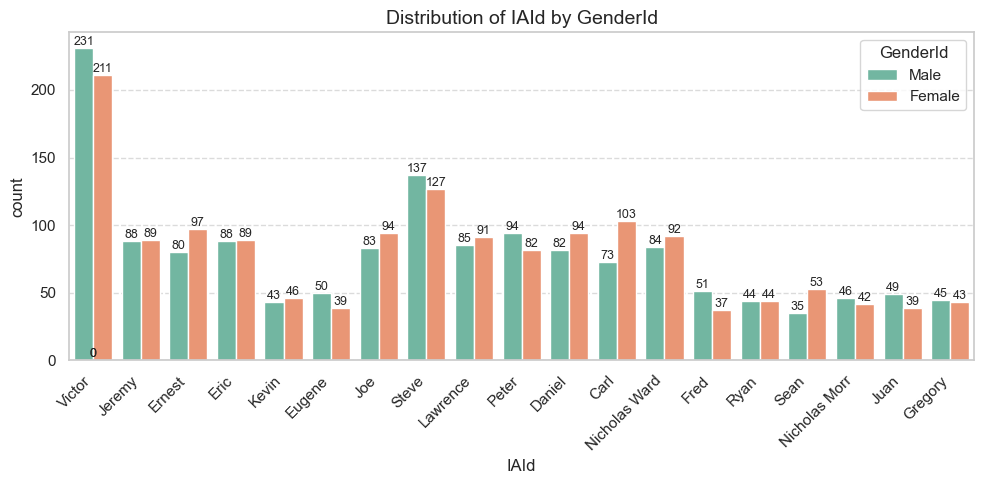

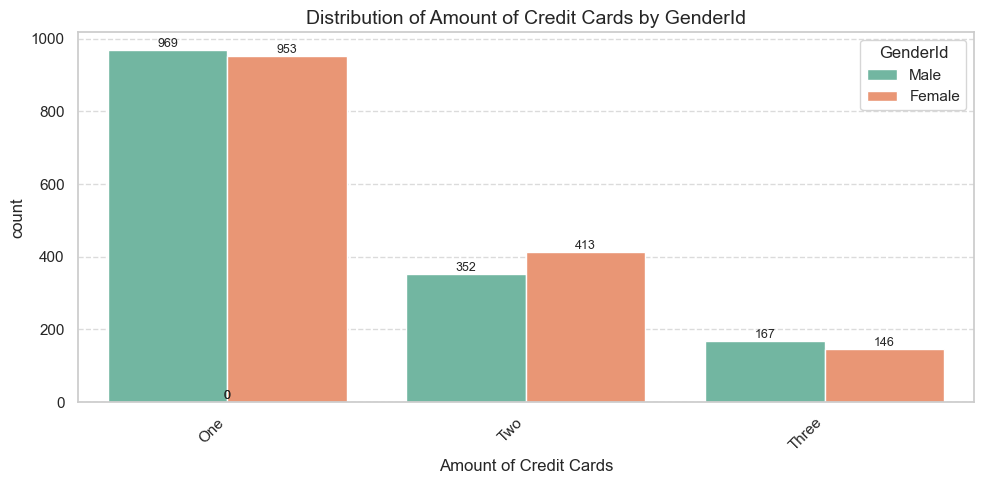

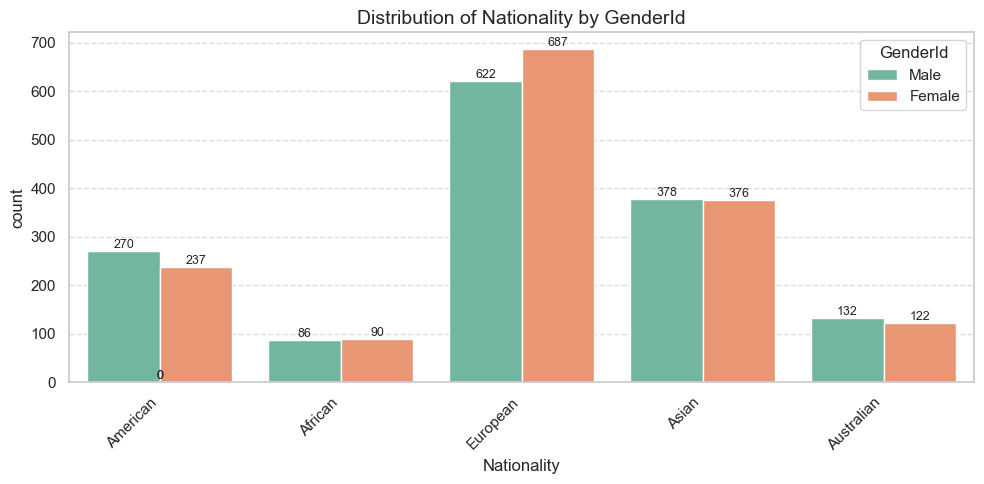

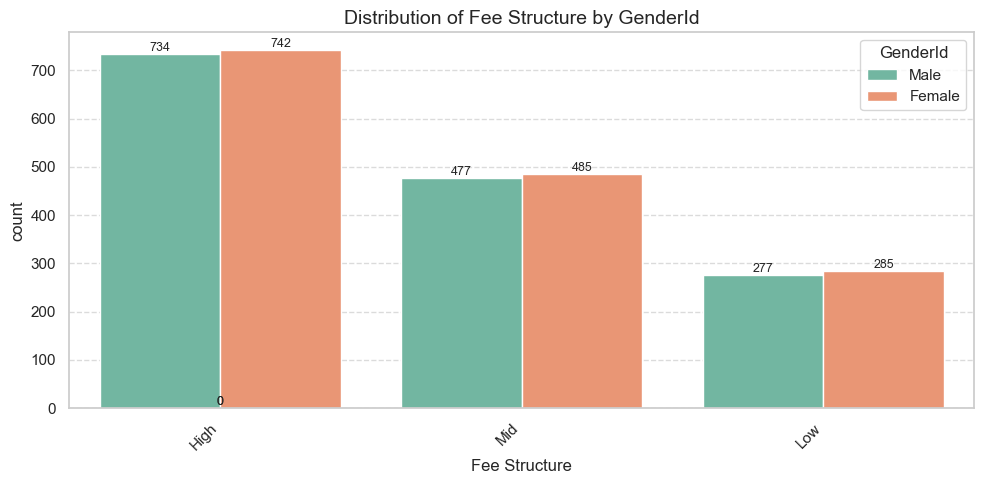

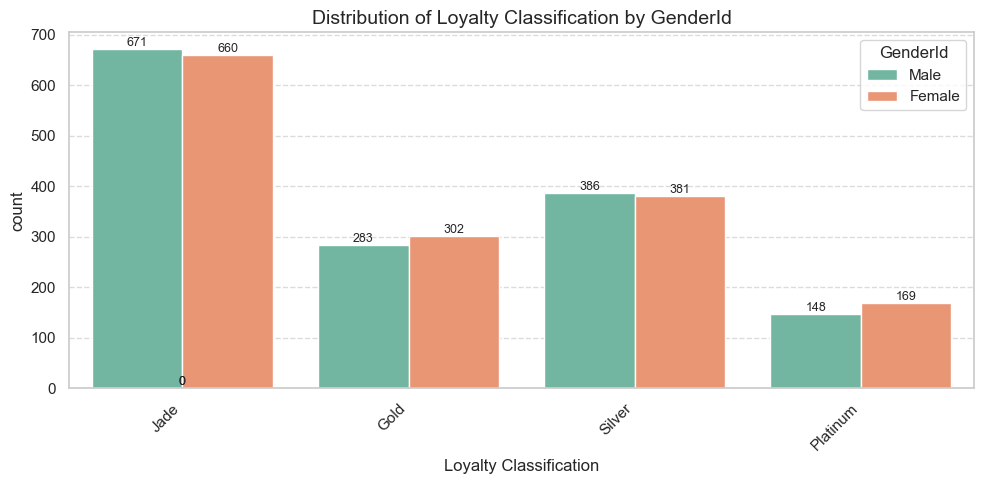

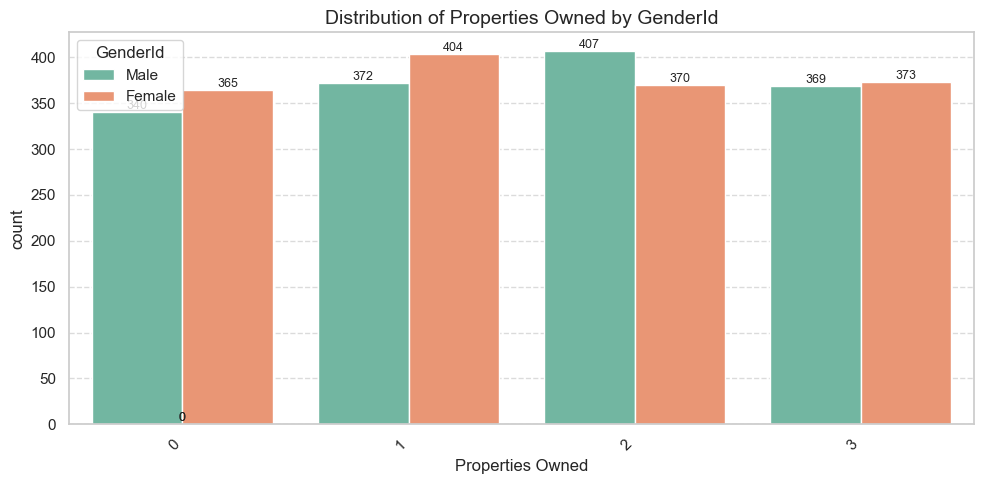

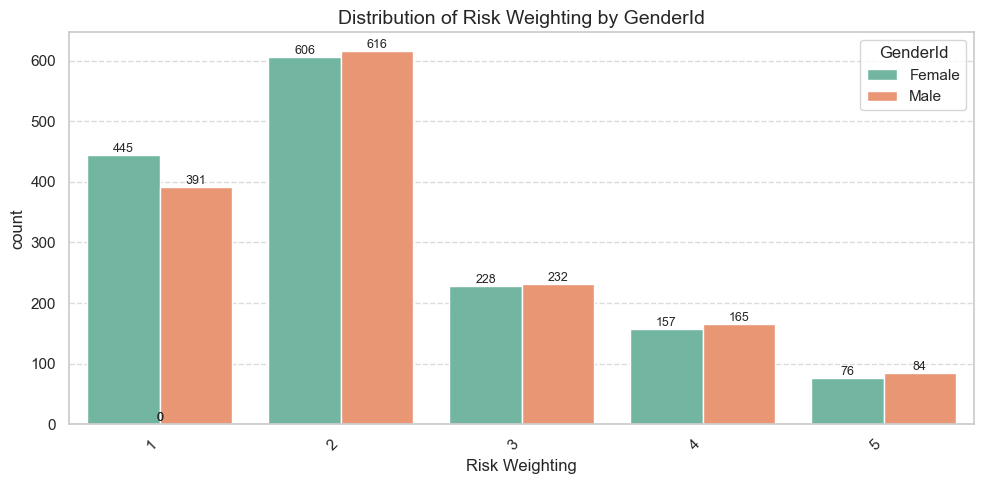

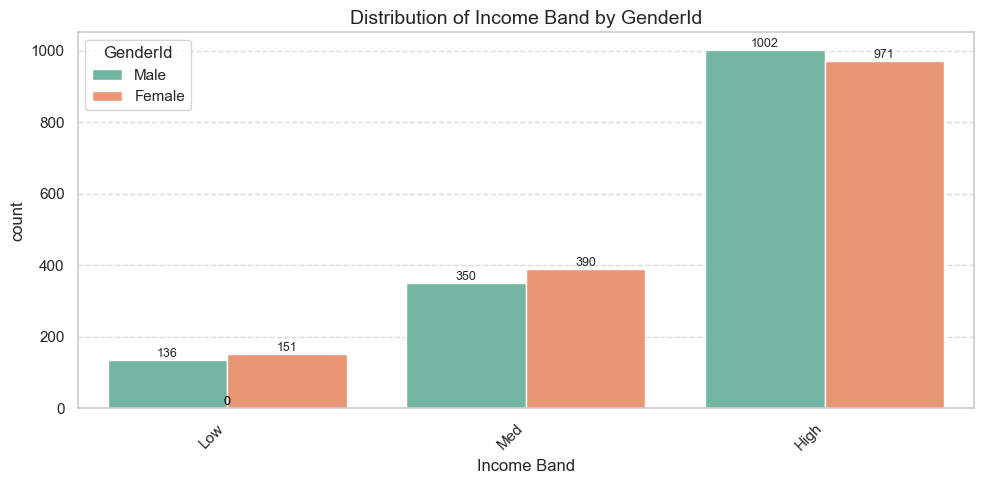

In [18]:
categorical_columns = ["BRId", "GenderId", "IAId", "Amount of Credit Cards", "Nationality", 
                       "Fee Structure", "Loyalty Classification", "Properties Owned", 
                       "Risk Weighting", "Income Band"]

for i, predictor in enumerate(categorical_columns):
    plt.figure(figsize=(10, 5))  # Wider chart
    ax = sns.countplot(data=df, x=predictor, hue="GenderId", palette="Set2")
    
    # Add count labels on bars
    for p in ax.patches:
        height = int(p.get_height())
        ax.annotate(height, (p.get_x() + p.get_width() / 2., height),
                    ha='center', va='bottom', fontsize=9)

    plt.title(f"Distribution of {predictor} by GenderId", fontsize=14)
    plt.xticks(rotation=45, ha='right')  # Rotate x-labels
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()

## Numerical Analysis

In [19]:
numerical_df = df.select_dtypes(include=["int64", "float64"]).columns
numerical_df

Index(['Age', 'Location ID', 'Estimated Income', 'Superannuation Savings',
       'Credit Card Balance', 'Bank Loans', 'Bank Deposits',
       'Checking Accounts', 'Saving Accounts', 'Foreign Currency Account',
       'Business Lending', 'Properties Owned', 'Risk Weighting'],
      dtype='object')

In [20]:
df.head(2)

,Client ID,Name,Age,Location ID,Joined Bank,Banking Contact,Nationality,Occupation,Fee Structure,Loyalty Classification,Estimated Income,Superannuation Savings,Amount of Credit Cards,Credit Card Balance,Bank Loans,Bank Deposits,Checking Accounts,Saving Accounts,Foreign Currency Account,Business Lending,Properties Owned,Risk Weighting,BRId,GenderId,IAId,Income Band
0,IND81288,Raymond Mills,24,34324,2019-05-06,Anthony Torres,American,Safety Technician IV,High,Jade,75384.77,17677.95,One,484.54,776242.92,1485828.64,603617.88,607332.46,12249.96,1134475.3,1,2,Retail,Male,Victor,Med
1,IND65833,Julia Spencer,23,42205,2001-12-10,Jonathan Hawkins,African,Software Consultant,High,Jade,289834.31,17398.92,One,2256.88,1270615.43,641482.79,229521.37,344635.16,61162.31,2000526.1,1,3,Institutional,Male,Jeremy,High


In [21]:
numerical_col = df[['Age', 'Estimated Income', 'Superannuation Savings', 'Credit Card Balance',
                    'Bank Loans', 'Bank Deposits', 'Checking Accounts', 'Saving Accounts', 
                    'Foreign Currency Account', 'Business Lending', 'Properties Owned', 'Risk Weighting']].columns

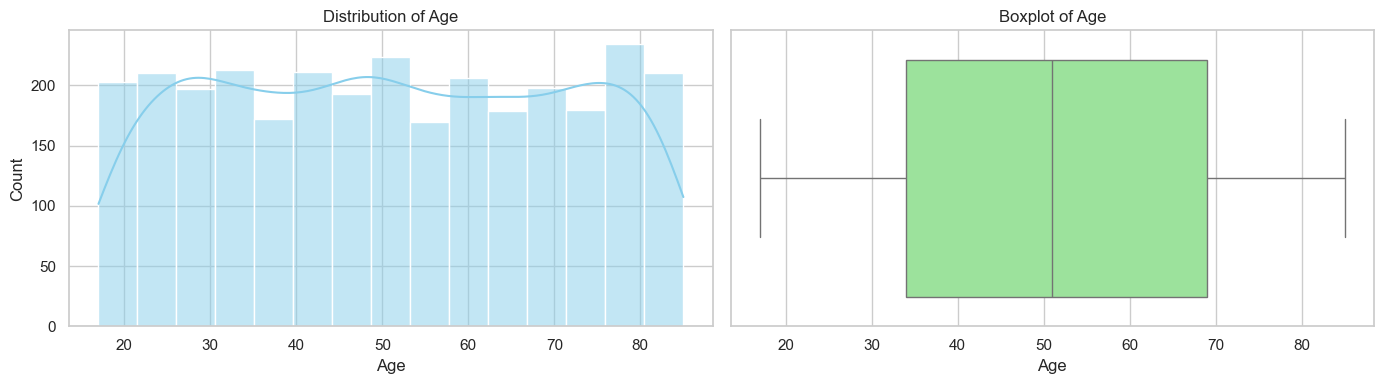

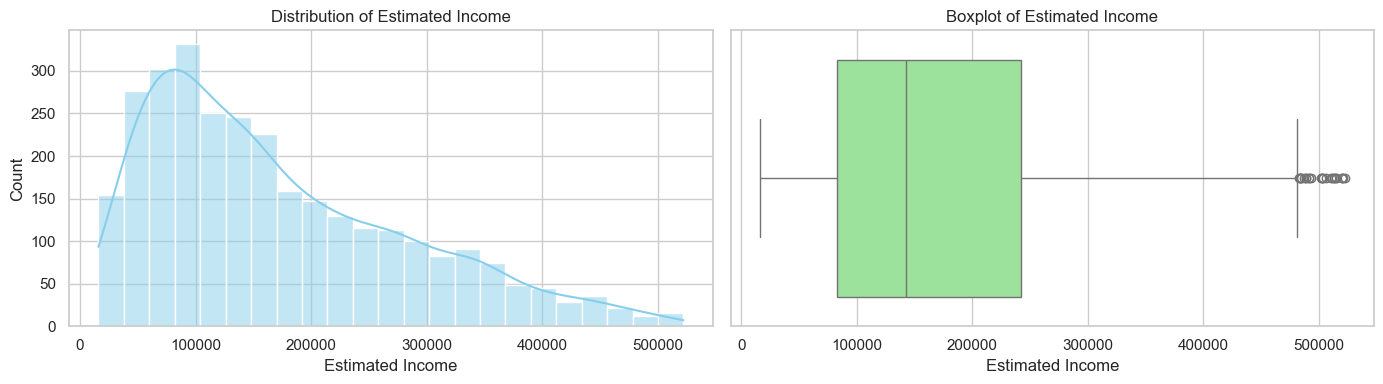

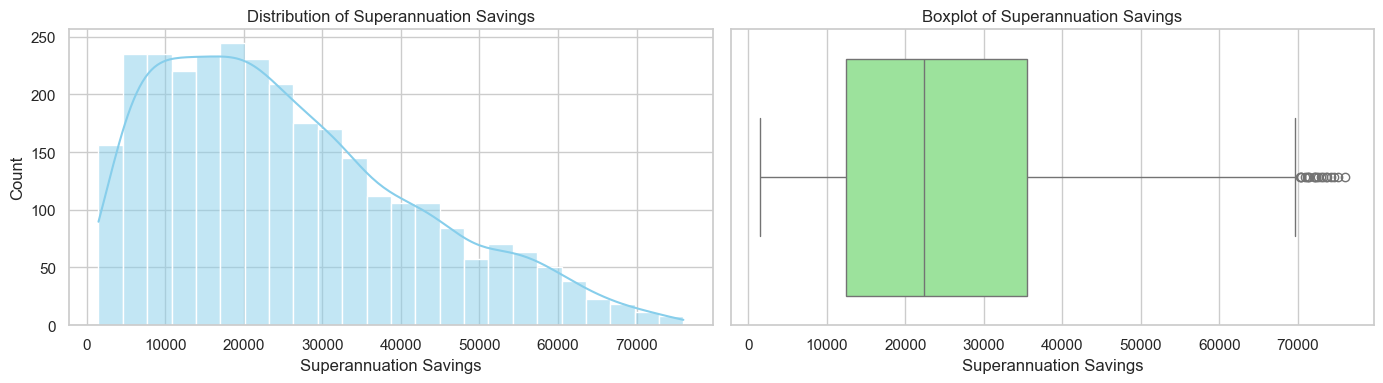

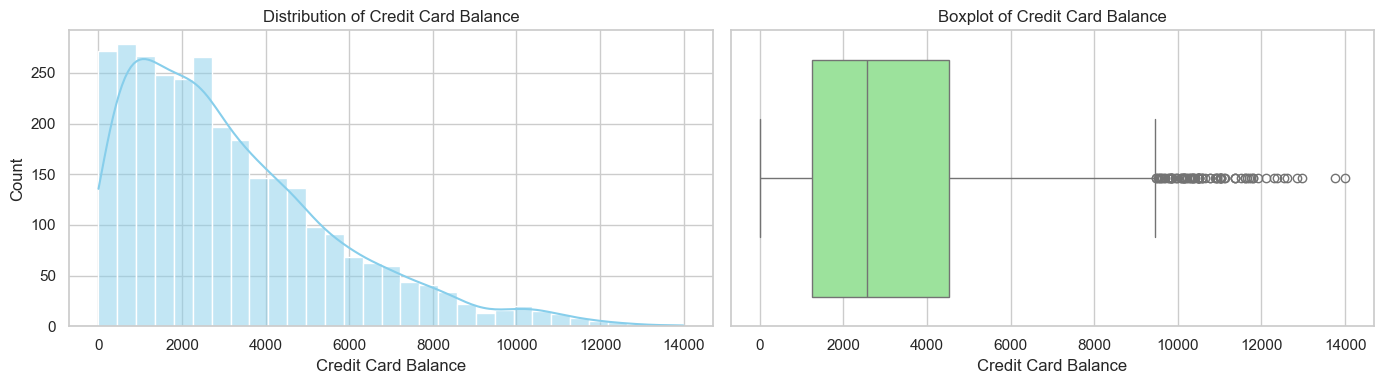

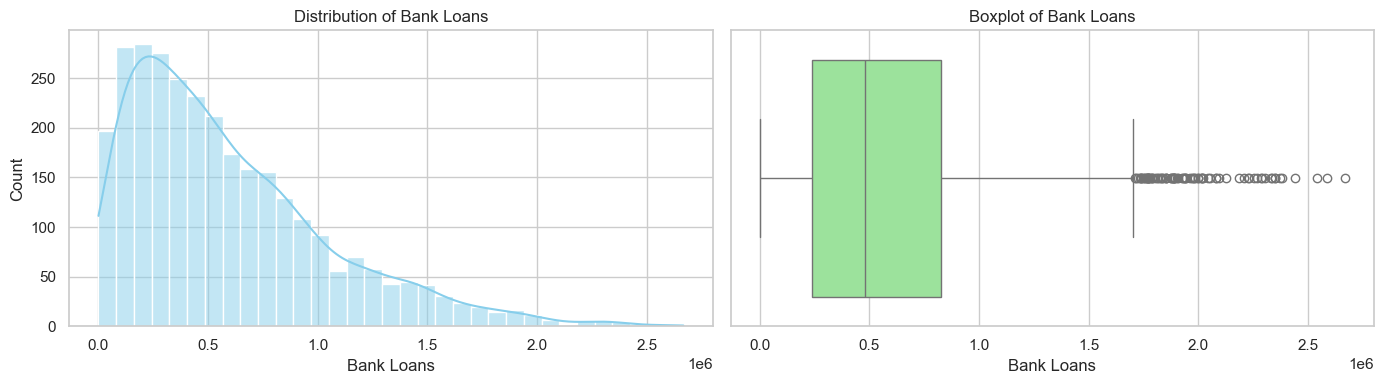

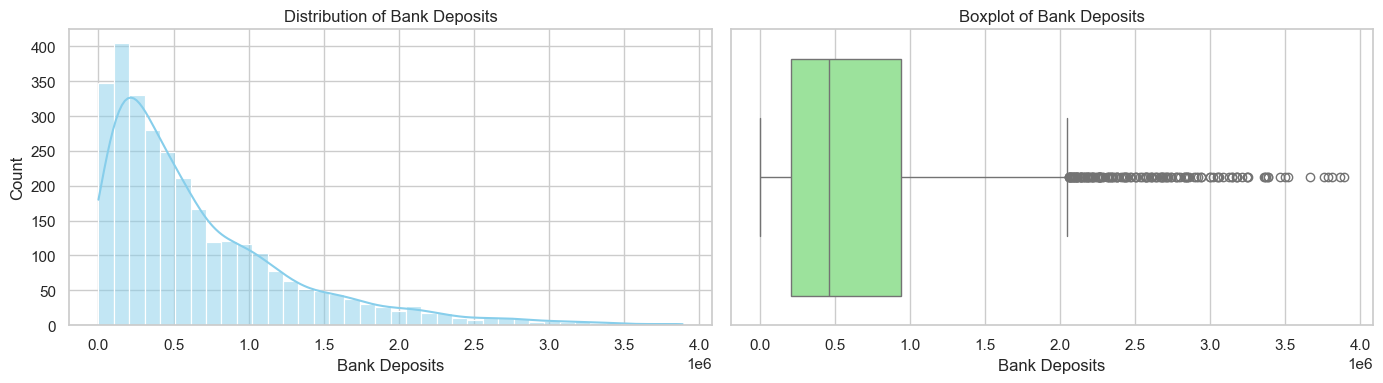

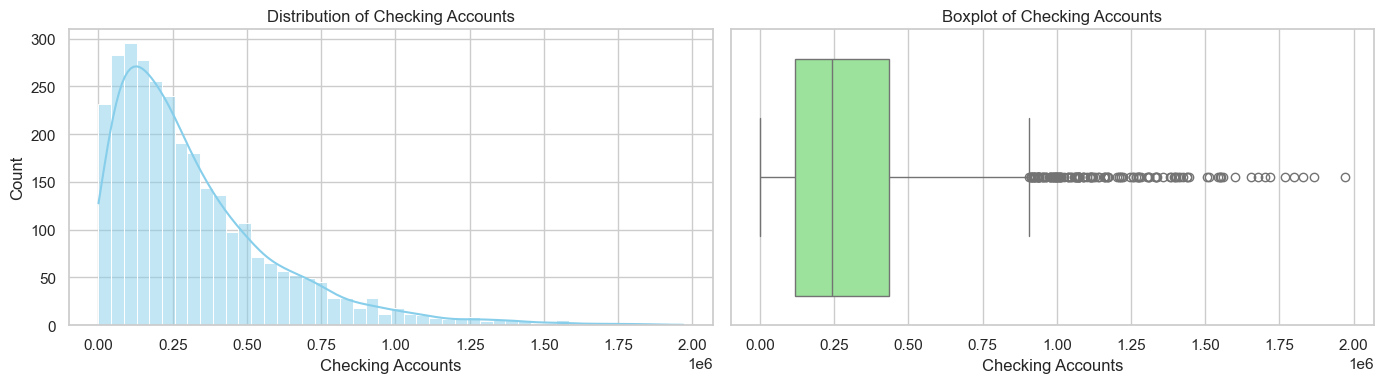

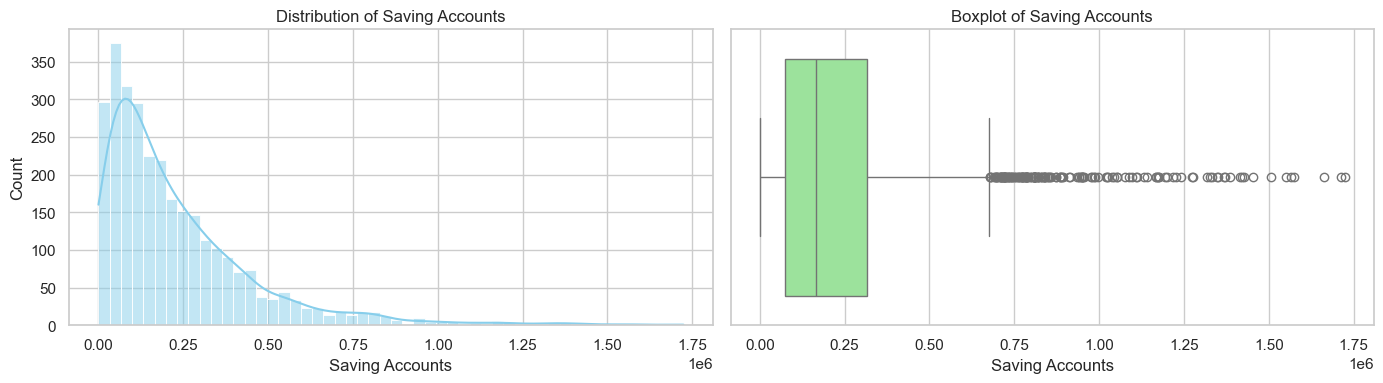

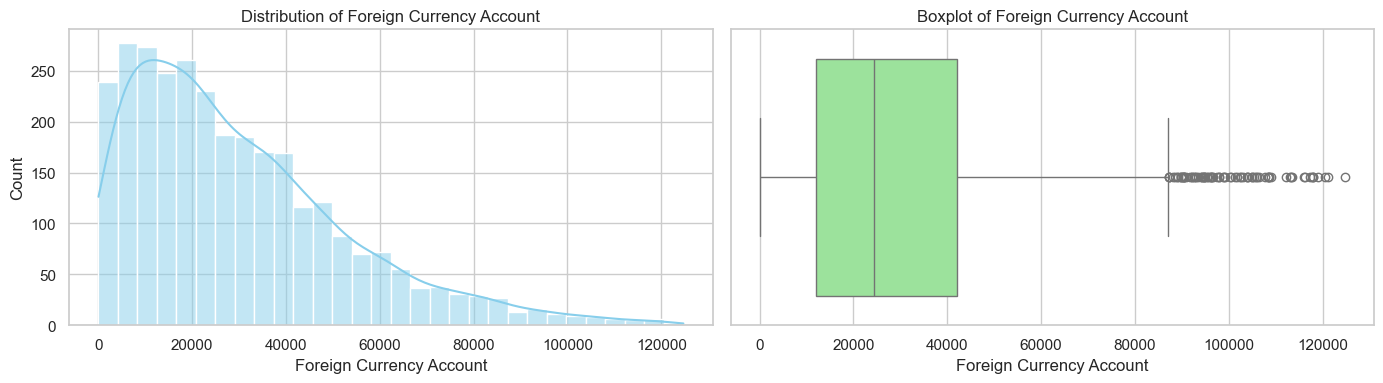

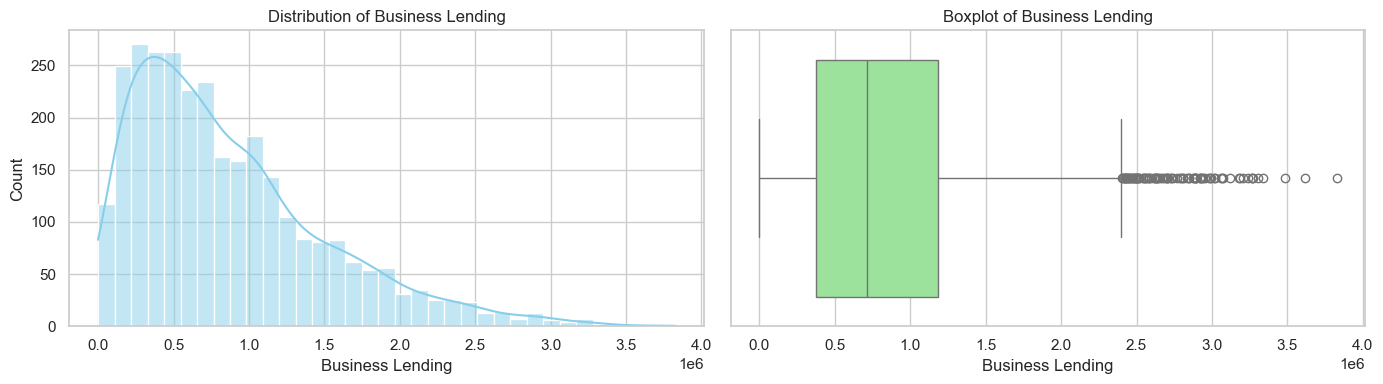

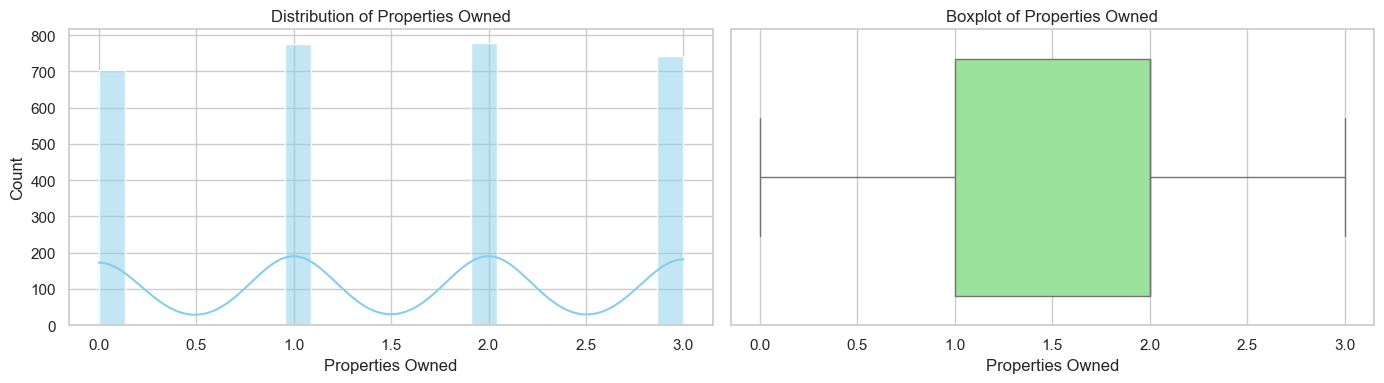

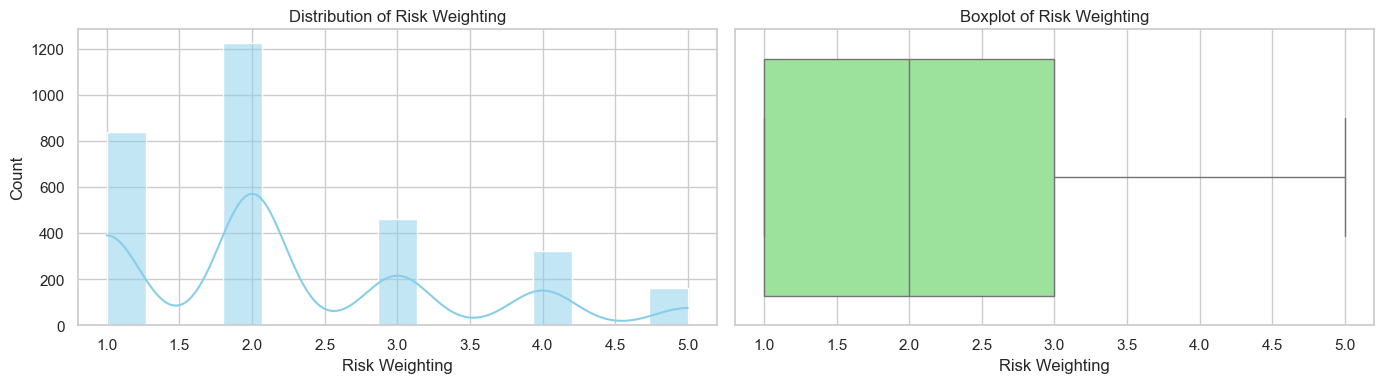

In [22]:
# Set overall style
sns.set(style="whitegrid")

# Plot histogram and boxplot for each numerical column
for col in numerical_col:
    fig, axes = plt.subplots(1, 2, figsize=(14, 4))

    # Histogram
    sns.histplot(df[col], kde=True, ax=axes[0], color='skyblue')
    axes[0].set_title(f'Distribution of {col}')
    axes[0].set_xlabel(col)

    # Boxplot
    sns.boxplot(x=df[col], ax=axes[1], color='lightgreen')
    axes[1].set_title(f'Boxplot of {col}')
    axes[1].set_xlabel(col)

    plt.tight_layout()
    plt.show()

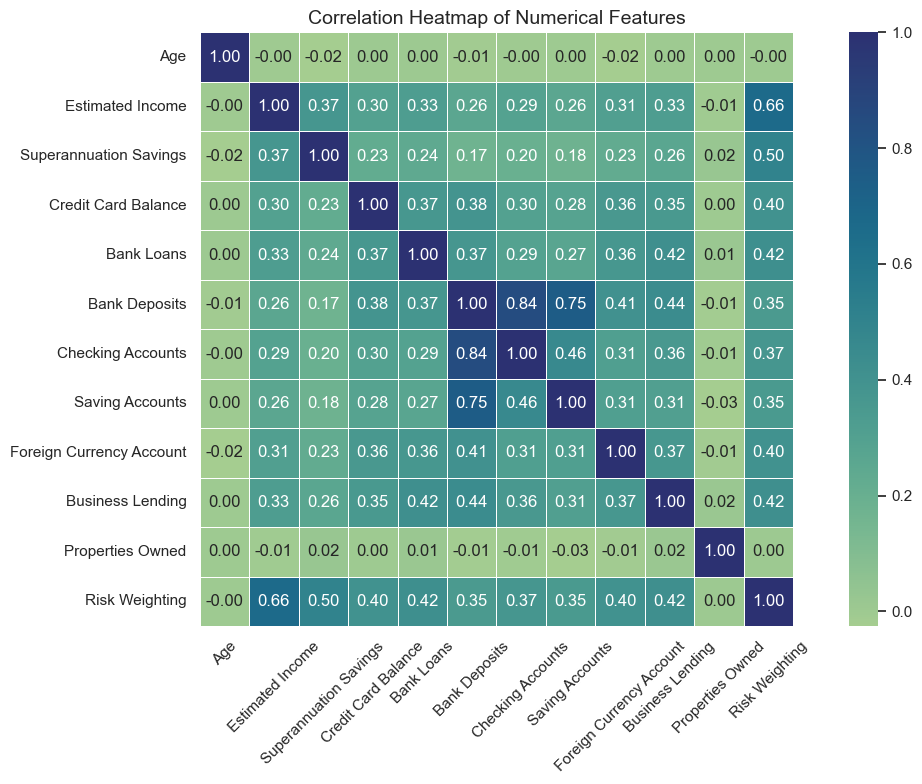

In [23]:
# Calculate correlation matrix
correlation_matrix = df[numerical_col].corr()

# Set plot size and style
plt.figure(figsize=(12, 8))
sns.set(style="white")

# Draw the heatmap
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="crest", square=True, linewidths=.5)

# Title
plt.title("Correlation Heatmap of Numerical Features", fontsize=14)
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

# Banking Analysis

## Q1. Which customer segments are most profitable to the bank?
### Based on metrics like:

• High Estimated Income,

• High Bank Deposits,

• Low Risk Weighting,

• Loyal (Loyalty Classification)

In [24]:
def format_dollars(value):
    if value >= 1_000_000:
        return f"{value / 1_000_000:.2f}M"
    elif value >= 1_000:
        return f"{value / 1_000:.2f}k"
    else:
        return str(value)

In [25]:
# Step 1: Group by Name and aggregate required columns
summary = df.groupby('Name')[['Estimated Income', 'Bank Deposits']].sum()

# Step 2: Merge Risk and Loyalty Info
extra_info = df.groupby('Name')[['Risk Weighting', 'Loyalty Classification']].first()
summary = summary.merge(extra_info, left_index=True, right_index=True)

# Step 3: Create a Profit Score (you can tweak this logic)
def calculate_profit_score(row):
    score = 0
    if row['Estimated Income'] > df['Estimated Income'].quantile(0.75):  # top 25%
        score += 1
    if row['Bank Deposits'] > df['Bank Deposits'].quantile(0.75):        # top 25%
        score += 1
    if row['Risk Weighting'] <= 2:  # Low risk
        score += 1
    if row['Loyalty Classification'] in ['Platinum', 'Gold']:
        score += 1
    return score
summary['Profit Score'] = summary.apply(calculate_profit_score, axis=1)

# Step 4: Add Comments
def add_comment(score):
    if score == 4:
        return "Very Profitable & Low Risk"
    elif score >= 3:
        return "Profitable Segment"
    elif score == 2:
        return "Medium Potential"
    else:
        return "Not Profitable / High Risk"
summary['Comment'] = summary['Profit Score'].apply(add_comment)

# Step 5: Sort and Format
top_customers = summary.sort_values(by='Profit Score', ascending=False).head(10)
top_customers['Estimated Income'] = top_customers['Estimated Income'].apply(lambda x: format_dollars(x))
top_customers['Bank Deposits'] = top_customers['Bank Deposits'].apply(lambda x: format_dollars(x))

# Final Output
top_customers.reset_index(inplace=True)  # Move Name to column
top_customers[['Name', 'Estimated Income', 'Bank Deposits', 'Risk Weighting', 'Loyalty Classification', 'Profit Score', 'Comment']]

,Name,Estimated Income,Bank Deposits,Risk Weighting,Loyalty Classification,Profit Score,Comment
0,Wayne Baker,535.98k,2.65M,2,Gold,4,Very Profitable & Low Risk
1,Earl Schmidt,277.77k,2.63M,2,Gold,4,Very Profitable & Low Risk
2,Willie Kennedy,263.68k,1.42M,2,Gold,4,Very Profitable & Low Risk
3,Doris Anderson,418.19k,1.32M,2,Platinum,4,Very Profitable & Low Risk
4,Eugene Boyd,338.11k,2.22M,2,Gold,4,Very Profitable & Low Risk
5,Ann Harper,327.05k,1.12M,2,Gold,4,Very Profitable & Low Risk
6,Frank Franklin,243.08k,1.04M,2,Platinum,4,Very Profitable & Low Risk
7,Patrick Stone,251.88k,2.07M,2,Platinum,4,Very Profitable & Low Risk
8,Clarence Matthews,248.22k,3.25M,2,Gold,4,Very Profitable & Low Risk
9,Daniel Welch,259.87k,968.24k,2,Gold,4,Very Profitable & Low Risk


###  Insight Summary
• Estimated Income:	Top 10 customers have high income (₹243K to ₹535K), indicating strong earning capacity.

• Bank Deposits:	Deposits range from ₹968K to ₹3.25M, highlighting significant capital held by these customers.

• Risk Weighting:	Top 10 customers have a low risk score of 2, indicating a very low credit or loan default risk.

• Loyalty Classification:	Top 10 customers are either Gold or Platinum members, indicating high loyalty and engagement with the bank.

• Comments:	Tagged as “Very Profitable & Low Risk”, ideal segment for retention and upselling.


## Q2. Which customers are over-leveraged (high loans vs income)?
Check: Bank Loans / Estimated Income > 0.5

Risky for future lending.

In [26]:
# Step 1: Calculate Loan-to-Income Ratio
df['Loan to Income Ratio'] = df['Bank Loans'] / df['Estimated Income']

# Step 2: Filter over-leveraged customers
over_leveraged = df[df['Loan to Income Ratio'] > 0.5]

# Optional: Select important columns to display
over_leveraged_customers = over_leveraged[['Name', 'Estimated Income', 'Bank Loans', 'Loan to Income Ratio', 'Risk Weighting']]

# Step 3: Sort by Loan-to-Income Ratio (highest first)
over_leveraged_customers = over_leveraged_customers.sort_values(by='Loan to Income Ratio', ascending=False)
over_leveraged_customers['Estimated Income'] = over_leveraged_customers['Estimated Income'].apply(lambda x: format_dollars(x))
over_leveraged_customers['Bank Loans'] = over_leveraged_customers['Bank Loans'].apply(lambda x: format_dollars(x))


# Final Output
over_leveraged_customers.reset_index(drop=True, inplace=True)
over_leveraged_customers.head(10)  # Top 10 risky customers

,Name,Estimated Income,Bank Loans,Loan to Income Ratio,Risk Weighting
0,Earl Payne,19.66k,810.41k,41.215502,1
1,Eugene Berry,23.80k,912.21k,38.327635,1
2,Roger Hernandez,20.67k,770.74k,37.280580,1
3,Jeffrey Taylor,44.09k,1.49M,33.699196,2
4,Kevin Weaver,34.40k,1.10M,32.055314,1
5,Antonio Ferguson,64.69k,2.05M,31.719163,3
6,Harry Weaver,30.53k,929.39k,30.438890,1
7,Phillip Perez,39.08k,1.19M,30.379184,2
8,Stephen Hamilton,30.13k,898.48k,29.818054,1
9,Dennis Alexander,22.12k,620.60k,28.054954,1


### Horizontal Bar Chart (Top 10 Risky Customers)

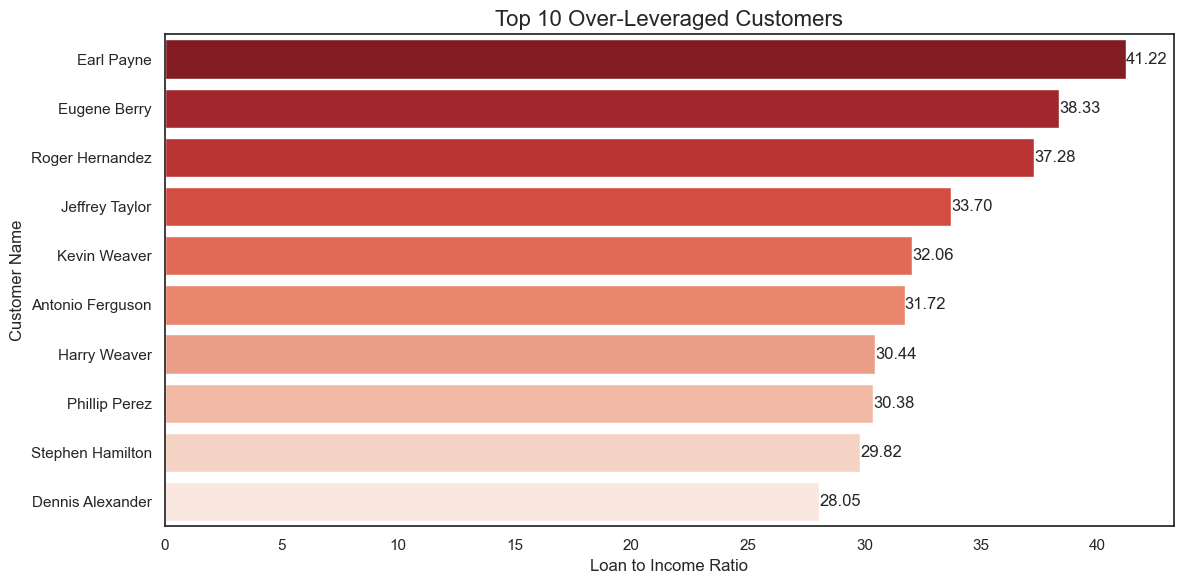

In [27]:
# Plot size
plt.figure(figsize=(12, 6))

# Horizontal barplot
sns.barplot(
    data=over_leveraged_customers.head(10),
    y='Name',
    x='Loan to Income Ratio',
    palette='Reds_r'  # high = dark red
)

# Title & Labels
plt.title('Top 10 Over-Leveraged Customers', fontsize=16)
plt.xlabel('Loan to Income Ratio', fontsize=12)
plt.ylabel('Customer Name', fontsize=12)

# Show ratio values on bars
for index, value in enumerate(over_leveraged_customers.head(10)['Loan to Income Ratio']):
    plt.text(value + 0.01, index, f"{value:.2f}", va='center')

plt.tight_layout()
plt.show()

### Pie Chart (Risk Distribution among Top 10)

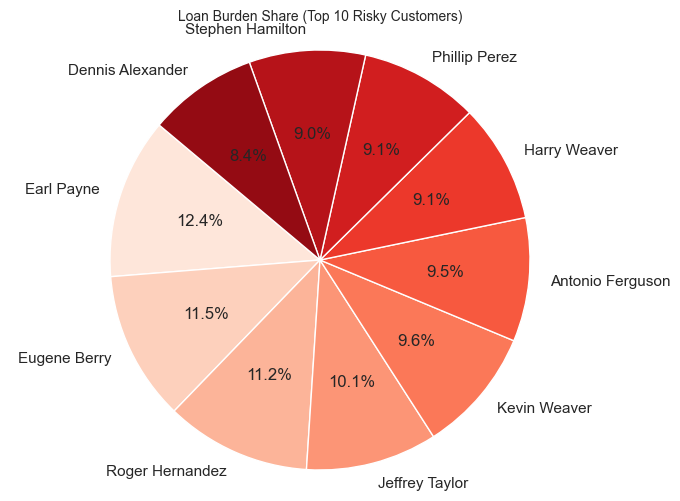

In [28]:
# Top 10 customers and their ratios
top10 = over_leveraged_customers.head(10)

plt.figure(figsize=(8, 6))
plt.pie(
    top10['Loan to Income Ratio'],
    labels=top10['Name'],
    autopct='%1.1f%%',
    startangle=140,
    colors=sns.color_palette('Reds', len(top10))
)
plt.title('Loan Burden Share (Top 10 Risky Customers)', fontsize=10)
plt.axis('equal')
plt.show()

## Q3. Do older customers have higher superannuation savings?
Segment by age & compare Superannuation Savings

In [29]:
# Step 1: Group and sum
Superannuation_Savings = df.groupby("Age")[['Superannuation Savings']].sum()

# Step 2: Sort by total savings, not age
older_cust = Superannuation_Savings.sort_values(by='Superannuation Savings', ascending=False).head(10)

older_cust['Superannuation Savings'] = older_cust['Superannuation Savings'].apply(lambda x: format_dollars(x))

# Step 3: Reset index to get 'Age' as column
older_cust.reset_index(inplace=True)

# Show
older_cust

,Age,Superannuation Savings
0,27,1.65M
1,38,1.51M
2,35,1.47M
3,47,1.46M
4,76,1.42M
5,28,1.41M
6,26,1.40M
7,48,1.38M
8,56,1.33M
9,73,1.33M


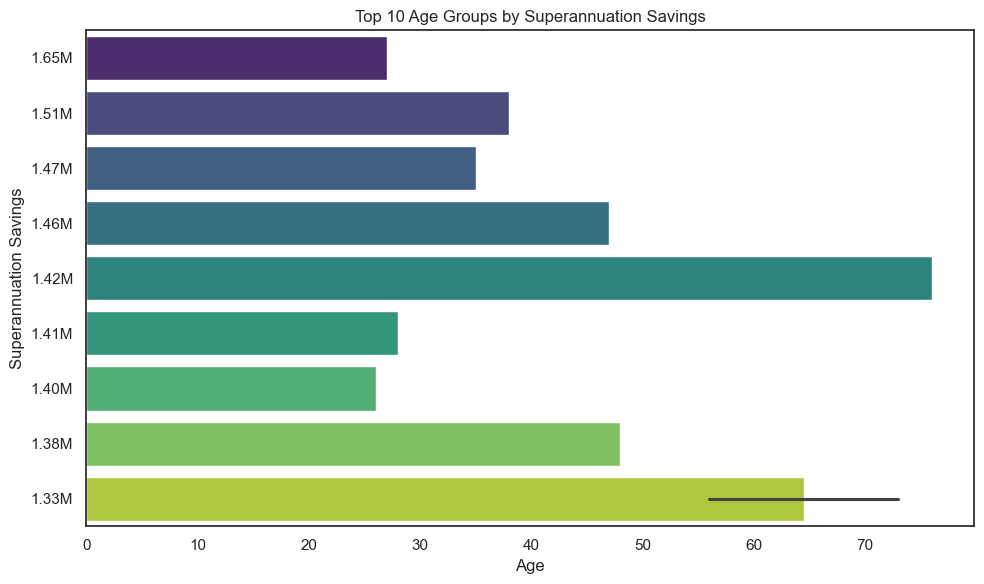

In [30]:
plt.figure(figsize=(10,6))
sns.barplot(data=older_cust, x='Age', y='Superannuation Savings', palette='viridis')
plt.title('Top 10 Age Groups by Superannuation Savings')
plt.xticks()
plt.tight_layout()
plt.show()

## Q4. Do customers with more ‘Properties Owned’ also have high loans or deposits?
Asset vs. borrowing behavior insight.

In [31]:
# Group by number of properties and calculate average loan and deposits
asset_vs_financials = df.groupby(["Properties Owned"])[["Bank Loans", "Bank Deposits"]].mean().reset_index()

asset_vs_financials["Bank Loans"] = asset_vs_financials["Bank Loans"].apply(lambda x: format_dollars(x))
asset_vs_financials["Bank Deposits"] = asset_vs_financials["Bank Deposits"].apply(lambda x: format_dollars(x))

asset_vs_financials

,Properties Owned,Bank Loans,Bank Deposits
0,0,567.61k,686.33k
1,1,617.27k,656.52k
2,2,575.81k,698.63k
3,3,603.22k,644.91k


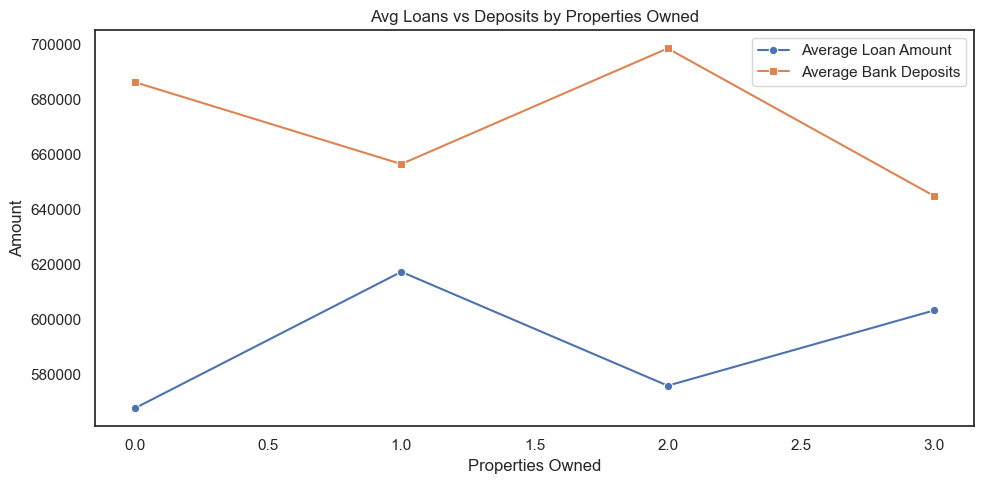

In [32]:
# Step 1: Group by only number of properties
agg = df.groupby("Properties Owned")[["Bank Loans", "Bank Deposits"]].mean().reset_index()

plt.figure(figsize=(10, 5))
sns.lineplot(data=agg, x='Properties Owned', y='Bank Loans', marker='o', label='Average Loan Amount')
sns.lineplot(data=agg, x='Properties Owned', y='Bank Deposits', marker='s', label='Average Bank Deposits')
plt.title("Avg Loans vs Deposits by Properties Owned")
plt.ylabel("Amount")
plt.xlabel("Properties Owned")
plt.legend()
plt.tight_layout()
plt.show()


## Q5.Which regions (Location ID) have high customer value but low engagement?
## ( Find locations where people keep a lot of money in the bank, but don't contact/interact with the bank much ?)
Compare Bank Deposits vs. Banking Contact frequency

In [33]:
# Step 1: Group by Banking Contact & Location ID with average Bank Deposits
location_insight = df.groupby(["Banking Contact", "Location ID"])[["Bank Deposits"]].mean().reset_index()

# Step 2: Calculate Contact Count per Location ID
contact_count = df.groupby("Location ID")["Banking Contact"].nunique().reset_index()
contact_count.rename(columns={"Banking Contact": "Contact Count"}, inplace=True)

# Step 3: Merge Contact Count with your grouped data
location_insight = pd.merge(location_insight, contact_count, on="Location ID", how="left")

# Step 4: Sort by Bank Deposits
target_regions = location_insight.sort_values(by="Bank Deposits", ascending=False).reset_index(drop=True)

# Step 5: Format Bank Deposits
target_regions["Bank Deposits"] = target_regions["Bank Deposits"].apply(lambda x: format_dollars(x))

# ✅ Final Output
target_regions.head(10)

,Banking Contact,Location ID,Bank Deposits,Contact Count
0,Frank Brown,11154,3.89M,1
1,Paul Holmes,38258,3.86M,1
2,George Lewis,29749,3.81M,1
3,Patrick Graham,12021,3.78M,1
4,Shawn Wallace,624,3.76M,1
5,George Lewis,20665,3.67M,1
6,Bobby Burton,37572,3.52M,1
7,Adam Hernandez,29676,3.50M,1
8,Phillip Peters,20345,3.47M,1
9,Douglas Tucker,11311,3.39M,1


## Q6. Which customers are high-risk for loan default based on 'Risk Weighting' and low income?
Target group to monitor or deny new loans

In [34]:
# Step 1: Calculate quantile thresholds
income_threshold = df['Estimated Income'].quantile(0.25)   # bottom 25% income
risk_threshold = df['Risk Weighting'].quantile(0.80)       # top 20% risk

# Step 2: Filter based on quantile thresholds
target_customers = df[
    (df['Estimated Income'] <= income_threshold) &
    (df['Risk Weighting'] >= risk_threshold)
]

# Step 3: Select relevant columns
target_customers = target_customers[[
    'Name', 'Estimated Income', 'Risk Weighting',
    'Bank Loans', 'Location ID', 'Properties Owned'
]]

# Step 4: Sort by Risk then Income
target_customers = target_customers.sort_values(
    by=['Risk Weighting', 'Estimated Income'],
    ascending=[False, True]
).reset_index(drop=True)

# Step 5: Format currency columns (optional, if format_dollars function is defined)
target_customers['Estimated Income'] = target_customers['Estimated Income'].apply(lambda x: format_dollars(x))
target_customers['Bank Loans'] = target_customers['Bank Loans'].apply(lambda x: format_dollars(x))

# Final Output: Show Top 10 risky customers
target_customers.head(10)

,Name,Estimated Income,Risk Weighting,Bank Loans,Location ID,Properties Owned
0,Emily Garza,74.34k,4,685.56k,36722,1
1,Larry Mcdonald,76.11k,4,470.53k,22075,2
2,Joshua Fisher,77.90k,4,182.64k,15500,0
3,Mark Garrett,77.92k,4,515.25k,25258,3
4,Howard Reed,78.95k,4,985.39k,12385,3
5,Bobby Smith,79.12k,4,0.0,2534,2
6,Tammy Dunn,79.84k,4,92.09k,35993,2
7,Henry Grant,82.70k,4,842.20k,21778,3
8,Stephen Jordan,59.13k,3,820.45k,15224,3
9,Johnny Watkins,59.71k,3,404.12k,8353,2


## Q7.  Which type of occupation brings the most revenue to the bank?
Based on Deposits, Loans, and Loyalty Classification

In [35]:
# Optional: Convert 'Loyalty Classification' to a numeric score
loyalty_map = {
    'Jade': 1,
    'Silver': 2,
    'Gold': 3,
    'Platinum': 4
}

df['Loyalty Score'] = df['Loyalty Classification'].map(loyalty_map)

# Compute Revenue Score (Deposits + Loans + Loyalty weight)
df['Revenue Score'] = df['Bank Deposits'] + df['Bank Loans'] + df['Loyalty Score']

# Group by Occupation and sum revenue
occupation_revenue = df.groupby('Occupation')['Revenue Score'].sum().reset_index()

# Sort in descending order
occupation_revenue = occupation_revenue.sort_values(by='Revenue Score', ascending=False)

occupation_revenue["Revenue Score"] = occupation_revenue["Revenue Score"].apply(lambda x: format_dollars(x))

# Display top occupations by revenue
occupation_revenue.head(10)

,Occupation,Revenue Score
173,Structural Analysis Engineer,38.92M
53,Database Administrator III,37.78M
112,Office Assistant III,35.77M
29,Automation Specialist IV,33.29M
154,Software Consultant,32.31M
7,Accountant II,31.95M
153,Social Worker,31.47M
0,Account Coordinator,31.44M
76,General Manager,30.89M
10,Accounting Assistant I,28.98M


## Q8. Are loyal customers actually more profitable?
Compare Loyalty Classification vs. Bank Deposits and Loans

In [36]:
loyal_cust = df.groupby(['Loyalty Classification'])[['Bank Deposits', 'Bank Loans']].mean().reset_index()

loyal_cust['Bank Deposits'] = loyal_cust['Bank Deposits'].apply(lambda x: format_dollars(x))
loyal_cust['Bank Loans'] = loyal_cust['Bank Loans'].apply(lambda x: format_dollars(x))
loyal_cust

,Loyalty Classification,Bank Deposits,Bank Loans
0,Gold,664.38k,574.38k
1,Jade,696.58k,605.68k
2,Platinum,611.70k,564.81k
3,Silver,658.36k,590.55k


In [37]:
# Group by Loyalty and compute average Deposits and Loans
loyal_cust = df.groupby('Loyalty Classification')[['Bank Deposits', 'Bank Loans']].mean().reset_index()

# Add Total Revenue = Deposits + Loans
loyal_cust['Total Revenue'] = loyal_cust['Bank Deposits'] + loyal_cust['Bank Loans']

# OPTIONAL: Round or format for display only (not analysis)
loyal_cust['Bank Deposits'] = loyal_cust['Bank Deposits'].apply(lambda x: format_dollars(x))
loyal_cust['Bank Loans'] = loyal_cust['Bank Loans'].apply(lambda x: format_dollars(x))
loyal_cust['Total Revenue'] = loyal_cust['Total Revenue'].apply(lambda x: format_dollars(x))

# Display result
loyal_cust

,Loyalty Classification,Bank Deposits,Bank Loans,Total Revenue
0,Gold,664.38k,574.38k,1.24M
1,Jade,696.58k,605.68k,1.30M
2,Platinum,611.70k,564.81k,1.18M
3,Silver,658.36k,590.55k,1.25M


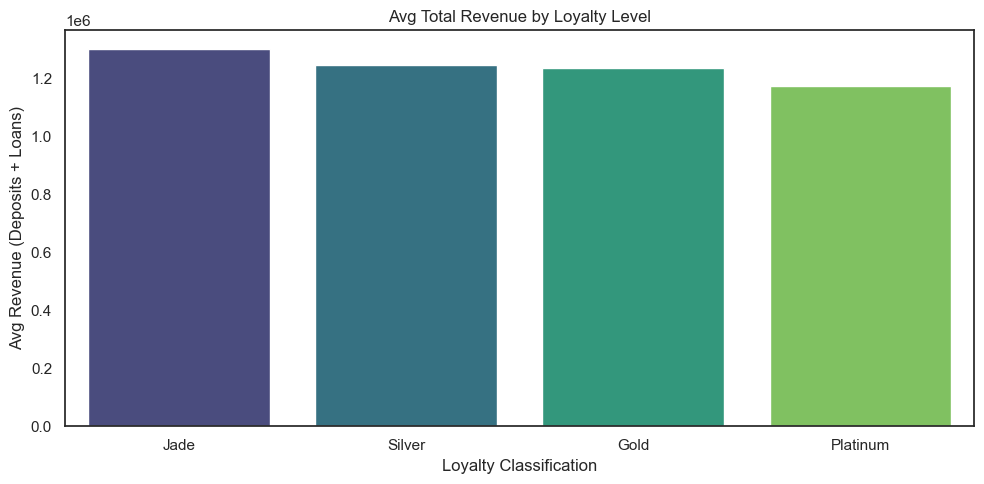

In [38]:
# Plot before formatting (using raw values)
raw_grouped = df.groupby('Loyalty Classification')[['Bank Deposits', 'Bank Loans']].mean().reset_index()
raw_grouped['Total Revenue'] = raw_grouped['Bank Deposits'] + raw_grouped['Bank Loans']

sns.barplot(data=raw_grouped, x='Loyalty Classification', y='Total Revenue', order=['Jade', 'Silver', 'Gold', 'Platinum'], palette='viridis')
plt.title('Avg Total Revenue by Loyalty Level')
plt.ylabel('Avg Revenue (Deposits + Loans)')
plt.xlabel('Loyalty Classification')
plt.tight_layout()
plt.show()

In [39]:
from scipy.stats import f_oneway

# Prepare data for ANOVA
groups = [df[df['Loyalty Classification'] == level]['Bank Deposits'] + df[df['Loyalty Classification'] == level]['Bank Loans']
          for level in ['Jade', 'Silver', 'Gold', 'Platinum'] if level in df['Loyalty Classification'].unique()]

f_stat, p_value = f_oneway(*groups)

print(f"\nANOVA F-statistic: {f_stat:.2f}, p-value: {p_value:.5f} \n")
if p_value < 0.05:
    print("Statistically significant: Loyalty level impacts revenue.")
else:
    print("Not statistically significant: Loyalty level may not affect revenue.")


ANOVA F-statistic: 1.94, p-value: 0.12129 

Not statistically significant: Loyalty level may not affect revenue.


## Q9. Which customers have multiple credit cards with high balances but low income?
Possible candidates for debt counseling or review.

In [41]:
# Convert 'Amount of Credit Cards' to numeric (if it's written as 'One', 'Two', etc.)
card_map = {'One':1, 'Two':2, 'Three':3}
df["Amount of Credit Cards"] = df["Amount of Credit Cards"].replace(card_map).astype(int)

# Define thresholds
high_balance_thresh = df['Credit Card Balance'].quantile(0.75)
low_income_thresh = df['Estimated Income'].quantile(0.25)

# Filter risky customers
risky_customers = df[
    (df['Amount of Credit Cards'] > 2) &
    (df['Credit Card Balance'] > high_balance_thresh) &
    (df['Estimated Income'] < low_income_thresh)
]

# Formating
risky_customers["Estimated Income"] = risky_customers["Estimated Income"].apply(lambda x: format_dollars(x))
risky_customers["Credit Card Balance"] = risky_customers["Credit Card Balance"].apply(lambda x: format_dollars(x))

# View results
print(f"Total risky customers found: {len(risky_customers)}")
risky_customers[['Name', 'Occupation', 'Estimated Income', 'Credit Card Balance', 'Amount of Credit Cards']]

Total risky customers found: 10


,Name,Occupation,Estimated Income,Credit Card Balance,Amount of Credit Cards
9,Jason Sims,Geologist III,65.37k,4.84k,3
476,Steve Dean,Librarian,82.85k,5.70k,3
838,Teresa Kennedy,Administrative Officer,68.54k,6.05k,3
1556,Sean Ellis,Data Coordiator,81.29k,9.27k,3
1744,Jacqueline Boyd,Data Coordiator,58.83k,5.53k,3
1881,Frank Moreno,Media Manager I,56.37k,7.40k,3
2199,Matthew James,Software Test Engineer IV,69.79k,6.08k,3
2248,Craig Stewart,Accountant I,41.26k,7.01k,3
2754,Stephen Perkins,Engineer II,79.16k,7.01k,3
2979,Christopher Watson,Automation Specialist III,40.91k,4.75k,3
